# Example 01: General Use of XGBoostClassifier
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slickml/slick-ml/blob/master/examples/classification/example_01_XGBoostClassifier.ipynb)

### Google Colab Configuration

In [1]:
# !git clone https://github.com/slickml/slick-ml.git
# %cd slick-ml
# !pip install -r requirements.txt

### Local Environment Configuration

In [2]:
# Change path to project root
%cd ../..

/Users/atahmassebi/Desktop/AmirStuff/GitHub/slick-ml


### Import Python Libraries

In [3]:
%load_ext autoreload

# widen the screen
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
%autoreload
from slickml.classification import XGBoostClassifier

_____
# XGBoostClassifier Docstring

In [5]:
help(XGBoostClassifier)

Help on class XGBoostClassifier in module slickml.classification:

class XGBoostClassifier(builtins.object)
 |  XGBoostClassifier(num_boost_round=None, metrics=None, sparse_matrix=False, scale_mean=False, scale_std=False, importance_type=None, params=None)
 |  
 |  XGBoost Classifier.
 |  This is wrapper using XGBoost classifier to train a XGBoost
 |  model with using number of boosting rounds from the inputs. This
 |  function is pretty useful when feature selection is done and you
 |  want to train a model on the whole data and test on a separate
 |  validation set. Main reference is XGBoost Python API:
 |  (https://xgboost.readthedocs.io/en/latest/python/python_api.html)
 |  
 |  Parameters
 |  ----------
 |  num_boost_round: int, optional (default=200)
 |      Number of boosting round to train the model
 |  
 |  metrics: str or tuple[str], optional (default=("auc"))
 |      Metric used for evaluation at cross-validation
 |      using xgboost.cv(). Please note that this is different

## Example

In [6]:
# loading data
df = pd.read_csv("data/clf_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [7]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, stratify=y, random_state=1367
)

In [9]:
# setup feature selector object
params = {
    "eval_metric": "auc",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
    "silent": 0,
}

clf = XGBoostClassifier(num_boost_round=333, metrics=("logloss"), params=params)
clf.fit(X_train, y_train)

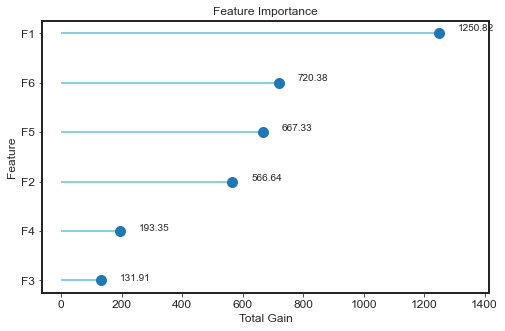

In [10]:
clf.plot_feature_importance()

In [11]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([0.6720365 , 0.5655868 , 0.99562705, 0.9463068 , 0.88080674,
       0.77455   , 0.58249676, 0.93462294, 0.9903142 , 0.9985297 ],
      dtype=float32)

In [12]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

[1, 0, 1, 1, 1, 1, 0, 1, 1, 1]

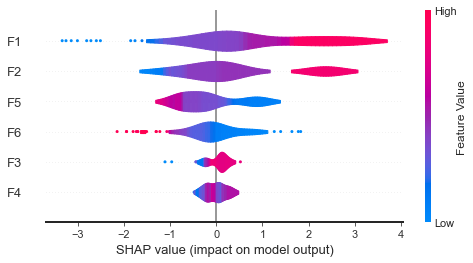

In [13]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

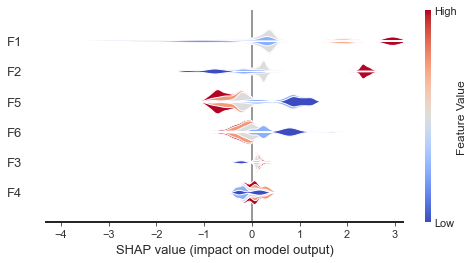

In [14]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(plot_type="layered_violin", validation=False, layered_violin_max_num_bins=5)

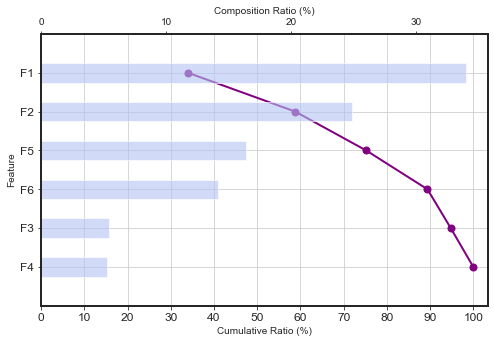

In [15]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [16]:
clf.shap_values_test_[:10]

array([[-1.3977536e+00, -7.3764610e-01,  3.4769246e-01,  4.7283206e-02,
         7.4657989e-01,  1.0651424e-01],
       [ 2.6375675e-01, -7.6384729e-01, -4.3277496e-01,  1.1251867e-02,
        -2.1562771e-01, -2.0362945e-01],
       [ 2.1143186e+00,  2.2659466e+00,  8.3920524e-02,  4.5984894e-02,
        -6.5455145e-01, -3.2409951e-02],
       [ 1.9647380e+00,  2.2224775e-01,  9.6091658e-02,  2.9802120e-01,
        -7.3567319e-01, -5.8088082e-01],
       [-6.9811740e-03, -1.3387736e+00, -3.8138890e-01, -1.1085838e-01,
         8.3745408e-01,  1.3959001e+00],
       [ 3.5730031e-01, -1.3693647e-01, -2.8975579e-01,  1.9261759e-02,
        -1.4145197e-01, -1.7897309e-01],
       [ 2.4563278e-01, -1.2008461e+00,  1.6584627e-01, -1.4547110e-03,
        -2.6656428e-01, -2.1432213e-01],
       [ 4.1076797e-01,  9.3420160e-01,  8.9663163e-02,  3.9665785e-02,
        -2.9785907e-01, -1.2120796e-01],
       [ 3.8862231e-01,  2.3394670e+00,  2.2751372e-01, -1.8879627e-01,
         2.2017452e-01, 

In [17]:
clf.shap_values_train_[:10]

array([[ 1.8154563 ,  2.455969  , -0.16794285, -0.37032005, -0.7298622 ,
        -0.40406618],
       [ 0.38064682, -0.2252746 ,  0.08241041,  0.23627505, -0.24025938,
        -0.2089367 ],
       [ 0.23795329, -1.3900957 , -0.4569098 ,  0.02677716,  0.15217488,
         0.18667053],
       [ 2.8691964 ,  2.27497   ,  0.08257811, -0.15183033, -0.0885161 ,
        -0.04004773],
       [ 2.8790805 ,  0.27727878,  0.07851844,  0.1218766 , -0.46742886,
        -1.1529218 ],
       [ 1.8611166 ,  2.4849942 , -0.15640756, -0.14187439, -0.7298622 ,
        -0.4272807 ],
       [ 1.9696661 ,  0.8747117 ,  0.08842412, -0.10493436, -0.4089225 ,
        -0.14101897],
       [ 0.32490328,  0.10496312,  0.09551135, -0.13292418, -0.21723771,
         1.2247537 ],
       [ 0.18152407, -0.19066863,  0.06876349,  0.08458936,  0.8723859 ,
         0.6827144 ],
       [ 0.14031158, -1.407543  ,  0.16652088,  0.07117616, -0.26193702,
        -0.24969369]], dtype=float32)

In [18]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F1,1250.819264
1,F6,720.375067
2,F5,667.330175
3,F2,566.643540
4,F4,193.349443
5,F3,131.907504


In [19]:
clf.model_